Build a regression model.

In [30]:
# import libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets, linear_model, model_selection
from sklearn.linear_model import LinearRegression
import csv

In [20]:
## csv file

flights_df = pd.read_csv('../data/flights_clean.csv')
flights_df.head()

,ID,Origin,Destination,Origin_City,Origin_State,Destination_City,Destination_State,Passengers,Seats,Flights,Distance,Fly_Date,Origin_Population,Destination_Population
0,AberdeenHuron00200807,ABR,HON,Aberdeen,SD,Huron,SD,0,0,1,74,200807,38991,15946
1,AberdeenHuron2757200611,ABR,HON,Aberdeen,SD,Huron,SD,27,57,3,74,200611,38886,15501
2,AberdeenHuron3051170200702,ABR,HON,Aberdeen,SD,Huron,SD,305,1170,39,74,200702,39026,15760
3,AberdeenHuron3076200704,ABR,HON,Aberdeen,SD,Huron,SD,30,76,4,74,200704,39026,15760
4,AberdeenHuron3121170200706,ABR,HON,Aberdeen,SD,Huron,SD,312,1170,39,74,200706,39026,15760


In [21]:
## print dataframe
print(flights_df)

                                ID Origin Destination Origin_City  \
0            AberdeenHuron00200807    ABR         HON    Aberdeen   
1          AberdeenHuron2757200611    ABR         HON    Aberdeen   
2       AberdeenHuron3051170200702    ABR         HON    Aberdeen   
3          AberdeenHuron3076200704    ABR         HON    Aberdeen   
4       AberdeenHuron3121170200706    ABR         HON    Aberdeen   
...                            ...    ...         ...         ...   
581058   ZanesvilleAtlanta00200402    ZZV         PDK  Zanesville   
581059   ZanesvilleAtlanta00200409    ZZV         PDK  Zanesville   
581060   ZanesvilleDetroit00200310    ZZV         YIP  Zanesville   
581061   ZanesvilleDetroit00200312    ZZV         YIP  Zanesville   
581062   ZanesvilleDetroit00200704    ZZV         YIP  Zanesville   

       Origin_State Destination_City Destination_State  Passengers  Seats  \
0                SD            Huron                SD           0      0   
1                

In [23]:
## information about all columns
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581063 entries, 0 to 581062
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ID                      581063 non-null  object
 1   Origin                  581063 non-null  object
 2   Destination             581063 non-null  object
 3   Origin_City             581063 non-null  object
 4   Origin_State            581063 non-null  object
 5   Destination_City        581063 non-null  object
 6   Destination_State       581063 non-null  object
 7   Passengers              581063 non-null  int64 
 8   Seats                   581063 non-null  int64 
 9   Flights                 581063 non-null  int64 
 10  Distance                581063 non-null  int64 
 11  Fly_Date                581063 non-null  int64 
 12  Origin_Population       581063 non-null  int64 
 13  Destination_Population  581063 non-null  int64 
dtypes: int64(7), object(7)
memory usage:

In [24]:
flights_df['ID'].nunique()

552290

ValueError: Could not interpret input 'flight'

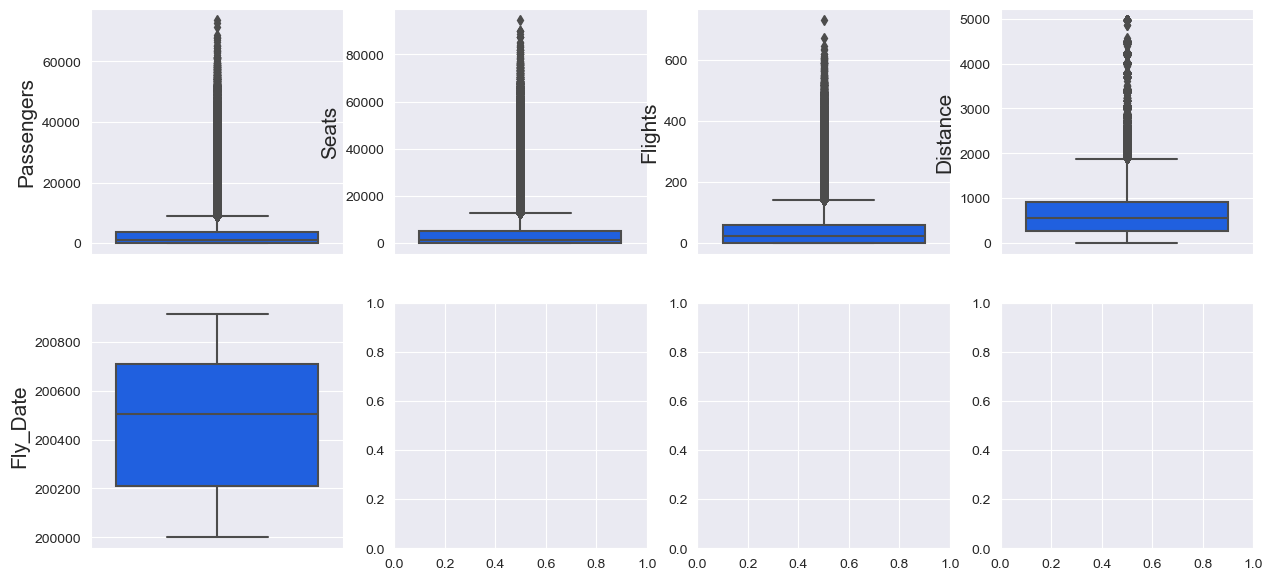

In [25]:
sns.set_style('darkgrid')
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))

flightdata = np.concatenate([flights_df.select_dtypes(exclude='object').columns.values,  flights_df.select_dtypes(include='object').columns.values])

fig, ax = plt.subplots(2, 4, figsize=(15,7),dpi=100)

for i,col in enumerate(flightdata):
    x = i//4
    y = i%4
    if i<5:
        sns.boxplot(data=flights_df, y=col, ax=ax[x,y])
        ax[x,y].yaxis.label.set_size(15)
    else:
        sns.boxplot(data=flights_df, x=col, y='flight', ax=ax[x,y])
        ax[x,y].xaxis.label.set_size(15)
        ax[x,y].yaxis.label.set_size(15)

plt.tight_layout()    
plt.show()

C:\Users\sarab\AppData\Local\Temp\ipykernel_19512\2459439911.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(pd.concat([flights_df.drop(target,axis=1), flights_df[target]],axis=1).corr(), annot=True, cmap=cmap)


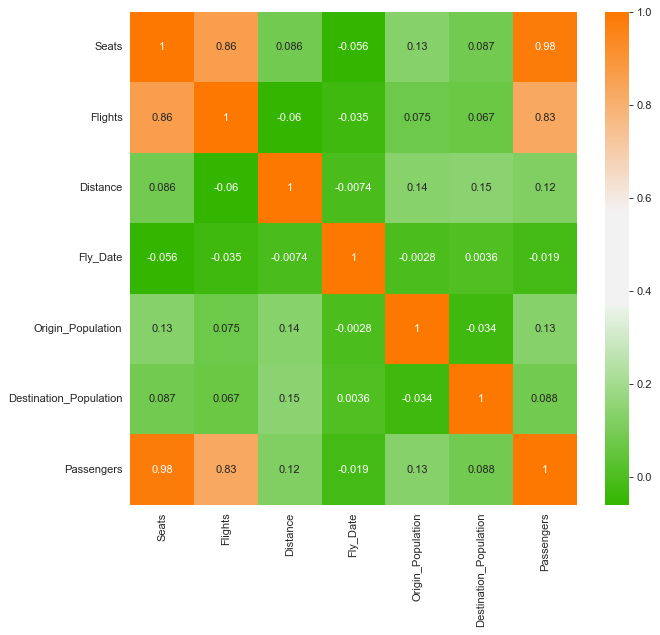

In [26]:
target = 'Passengers'
cmap = sns.diverging_palette(125, 28, s=100, l=65, sep=50, as_cmap=True)
fig, ax = plt.subplots(figsize=(9, 8), dpi=80)
ax = sns.heatmap(pd.concat([flights_df.drop(target,axis=1), flights_df[target]],axis=1).corr(), annot=True, cmap=cmap)
plt.show()

In [33]:
X = flights_df.drop('Passengers', axis=1)
y = flights_df['Passengers']

In [35]:
model_lr = LinearRegression().fit(X,y)
model_lr
model_lr.coef_

ValueError: could not convert string to float: 'AberdeenHuron00200807'

In [28]:
flights_df.isnull().sum()

ID                        0
Origin                    0
Destination               0
Origin_City               0
Origin_State              0
Destination_City          0
Destination_State         0
Passengers                0
Seats                     0
Flights                   0
Distance                  0
Fly_Date                  0
Origin_Population         0
Destination_Population    0
dtype: int64

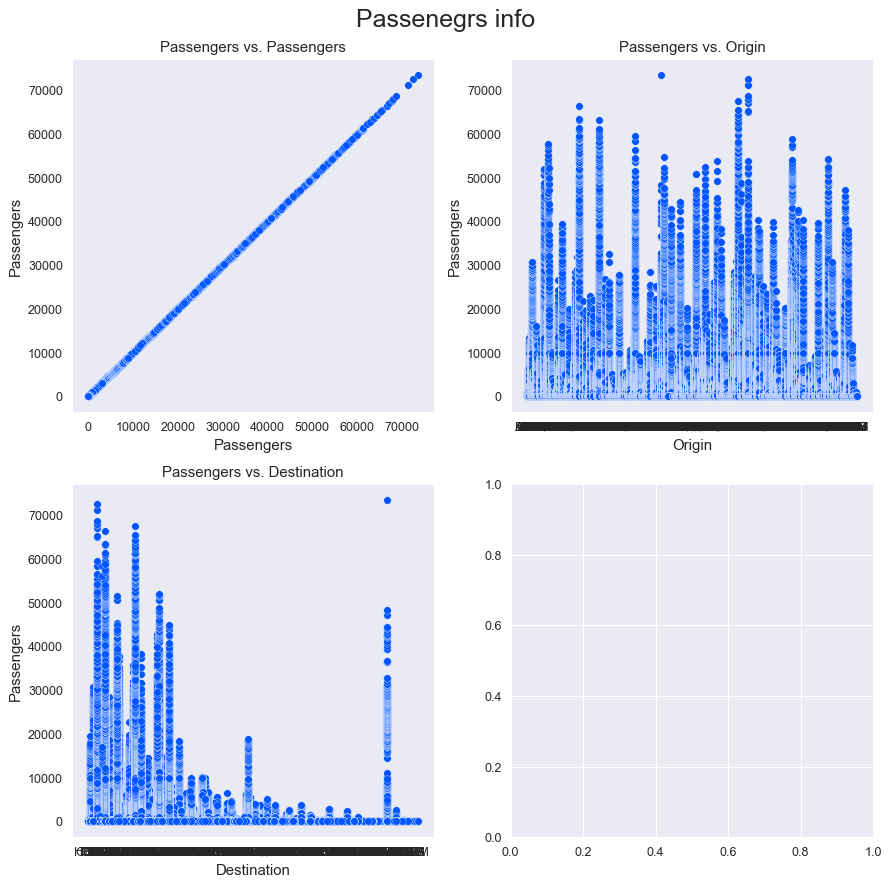

In [16]:
fig, ax = plt.subplots(nrows=2 ,ncols=2, figsize=(10,10), dpi=90)
num_features = ['Passengers', 'Origin', 'Destination']
target = 'Passengers'
c = '#0055ff'

for i in range(len(num_features)):
    row = i//2
    col = i%2
    ax[row,col].scatter(flights_df[num_features[i]], flights_df[target], color=c, edgecolors='w', linewidths=0.25)
    ax[row,col].set_title('{} vs. {}'.format(target, num_features[i]), size = 12)
    ax[row,col].set_xlabel(num_features[i], size = 12)
    ax[row,col].set_ylabel(target, size = 12)
    ax[row,col].grid()

plt.suptitle('Passenegrs info', size = 20)
plt.tight_layout()
plt.show()